In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%matplotlib inline

In [10]:
# use as example seqs, 500 seqs annotated with center information
fa_fn = "/home/maticzkd/projects/GraphProt/scratch/150526_prepare_gp_update_train_seqs/PARCLIP_QKI.ls.positives.fa"

In [11]:
def preview_seq(seq_iter):
    import itertools as it
    start=0 # inclusive, 0-based
    stop=2  # exclusive
    for header,seq in it.islice(seq_iter, start, stop):
        print(header)
        print(seq)

In [12]:
# create a sequence tuple generator that does not change the input sequences
from eden.converter.fasta import fasta_to_sequence
seq = fasta_to_sequence(fa_fn, normalize=False)
preview_seq(seq)

>CID_002397;chr11,92153775,92153807,+	center:166
cctcttcttgtctcccactcaacttagtatcgagtgggatttcacatcaaagttcttgtcctgaaggattcagcagttccagaagacatggcaagaatcagctctcagtcagcttttcaactccttgatgggggggttaagagtagagagAACTATCCATCATAACTAAATCTTTACTAATAatttaaattctacagattccaggactatggcatcttgactcagtaaatctttcttgcctttcctttttttaaaacaagggaaaaatatacaaacagattaaagtgcacttacaaacccagctggcttgttttaagctcccaaaggaacac
>CID_000206;chr1,40948630,40948662,+	center:166
catgtgatgacagaacttcaaaataaagcaaaattgacagaactaaagagagatatagacaaaatcacagtaattagaaactttaacacttctttctcagtaattgatgtaaccagtagacaaaaactcatcaaggatacagaagatttgAACAACACTATCAACCAATTTAACCTAATTAAcacttacggaacactacgtctaacaactacagaacatatattctttttaaaaatagagatctcatttttaaatgagatctgcgggtggggtggaataaactggtggatcaactgggggtggagtggaataccgtttaaaaaggggcatga


In [13]:
# create a sequence tuple generator that normalizes the sequences (uppercase, T->U)
from eden.converter.fasta import fasta_to_sequence
seq = fasta_to_sequence(fa_fn)
preview_seq(seq)

>CID_002397;chr11,92153775,92153807,+	center:166
CCUCUUCUUGUCUCCCACUCAACUUAGUAUCGAGUGGGAUUUCACAUCAAAGUUCUUGUCCUGAAGGAUUCAGCAGUUCCAGAAGACAUGGCAAGAAUCAGCUCUCAGUCAGCUUUUCAACUCCUUGAUGGGGGGGUUAAGAGUAGAGAGAACUAUCCAUCAUAACUAAAUCUUUACUAAUAAUUUAAAUUCUACAGAUUCCAGGACUAUGGCAUCUUGACUCAGUAAAUCUUUCUUGCCUUUCCUUUUUUUAAAACAAGGGAAAAAUAUACAAACAGAUUAAAGUGCACUUACAAACCCAGCUGGCUUGUUUUAAGCUCCCAAAGGAACAC
>CID_000206;chr1,40948630,40948662,+	center:166
CAUGUGAUGACAGAACUUCAAAAUAAAGCAAAAUUGACAGAACUAAAGAGAGAUAUAGACAAAAUCACAGUAAUUAGAAACUUUAACACUUCUUUCUCAGUAAUUGAUGUAACCAGUAGACAAAAACUCAUCAAGGAUACAGAAGAUUUGAACAACACUAUCAACCAAUUUAACCUAAUUAACACUUACGGAACACUACGUCUAACAACUACAGAACAUAUAUUCUUUUUAAAAAUAGAGAUCUCAUUUUUAAAUGAGAUCUGCGGGUGGGGUGGAAUAAACUGGUGGAUCAACUGGGGGUGGAGUGGAAUACCGUUUAAAAAGGGGCAUGA


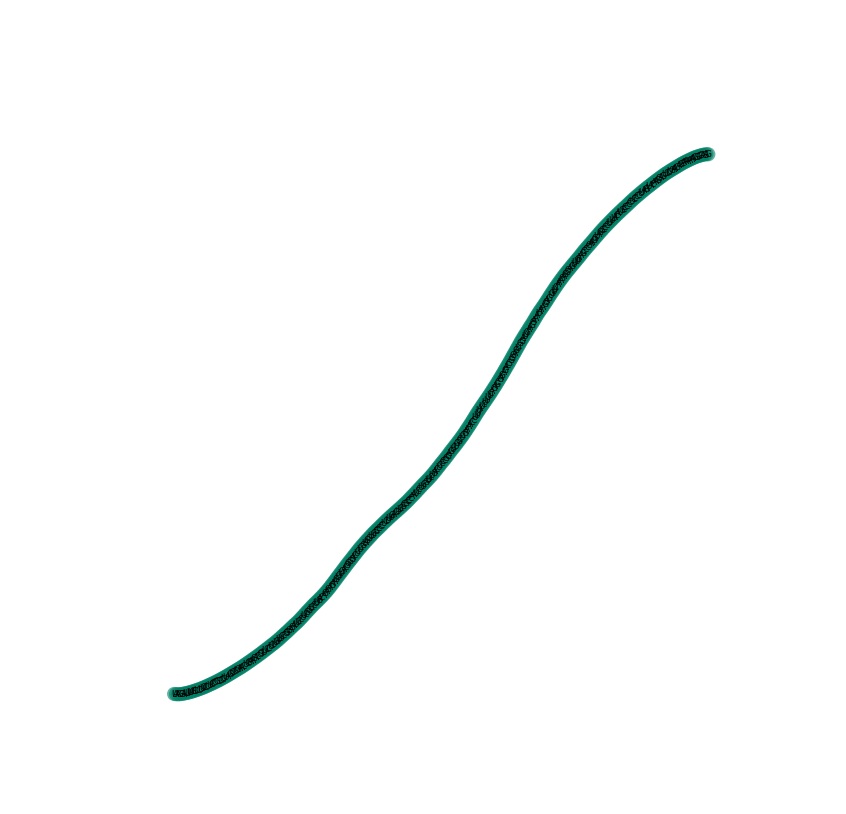

In [14]:
# convert sequences to graphs
from eden.converter.fasta import sequence_to_eden
graphs = sequence_to_eden(seq)

#parameters for visualization
opts={'size':14, 'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6}

# plotting function
from eden.util.display import draw_graph, serialize_graph
import itertools
def plot(graphs, opts=None):    
    graphs = itertools.islice(graphs,0,1)
    for graph in graphs: draw_graph(graph, **opts)

my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer'})

plot(graphs, opts=my_opt)